<a href="https://colab.research.google.com/github/9075197427/placement-predictions/blob/main/Copy_of_Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package(in lpa)')

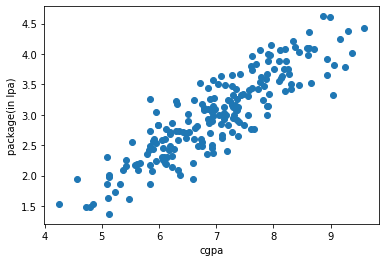

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package(in lpa)')

In [5]:
X=df.iloc[:,0:1]#basically iloc gives the specific values

In [6]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [7]:
Y=df.iloc[:,-1]

In [8]:
Y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr=LinearRegression()

In [12]:
lr.fit(X_train,Y_train)

LinearRegression()

In [13]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [14]:
Y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [15]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'package(in lpa)')

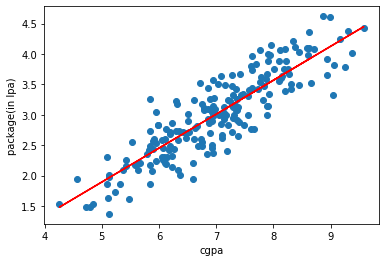

In [16]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('package(in lpa)')

In [17]:
m=lr.coef_

In [18]:
b=lr.intercept_

In [19]:
#y=mx+b
m*8.58+b

array([3.89111601])

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [21]:
Y_pred=lr.predict(X_test)

In [22]:
Y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [23]:
print("MAE",mean_absolute_error(Y_test,Y_pred))

MAE 0.2884710931878175


In [25]:
print("MSE",mean_squared_error(Y_test,Y_pred))

MSE 0.12129235313495527


In [26]:
print("RMSE",np.sqrt(mean_absolute_error(Y_test,Y_pred)))

RMSE 0.5370950504220063


In [27]:
print("R2score",r2_score(Y_test,Y_pred))

R2score 0.780730147510384


In [29]:
r2=r2_score(Y_test,Y_pred)

In [30]:
X_test.shape

(40, 1)

In [31]:
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343415